In [27]:
%matplotlib notebook

In [28]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [41]:
# Load in the dataframe
cta_df = pd.read_csv('../Resources/ctatweets.csv',  encoding = 'ISO-8859-1')
cta_df.head()

,tweet,user,location,date
0,RT @gjsibio: Northbound Red Line L Train at th...,MOFFITW,"uptown, chi-city â¶â¶â¶â¶",2019-10-22 23:59:06
1,RT @cta: [Minor Delays / Reroute] 70 Division ...,transit_tweets,NaN,2019-10-22 23:50:28
2,RT @cta: [Minor Delays / Reroute] 70 Division ...,huskeeman82,"Chicago, IL",2019-10-22 23:46:38
3,"Hey, @cta. Please turn on the heaters. Winter ...",rkhavard,"Chicago, IL",2019-10-22 23:44:53
4,.@cta Kimball bound Brown line train experienc...,aspaulding777,"Chicago, IL",2019-10-22 23:09:48


In [42]:
cta_df['date'] = pd.to_datetime(cta_df['date']).dt.to_period('d')
cta_df.head()

,tweet,user,location,date
0,RT @gjsibio: Northbound Red Line L Train at th...,MOFFITW,"uptown, chi-city â¶â¶â¶â¶",2019-10-22
1,RT @cta: [Minor Delays / Reroute] 70 Division ...,transit_tweets,NaN,2019-10-22
2,RT @cta: [Minor Delays / Reroute] 70 Division ...,huskeeman82,"Chicago, IL",2019-10-22
3,"Hey, @cta. Please turn on the heaters. Winter ...",rkhavard,"Chicago, IL",2019-10-22
4,.@cta Kimball bound Brown line train experienc...,aspaulding777,"Chicago, IL",2019-10-22


In [43]:
# group by date
grouped_cta_df = cta_df.groupby(['date']).count()

grouped_cta_df.head(20)

,tweet,user,location
date,,,
2019-10-13,19,19,14
2019-10-14,249,249,169
2019-10-15,260,260,186
2019-10-16,214,214,155
2019-10-17,430,430,314
2019-10-18,393,393,288
2019-10-19,200,200,140
2019-10-20,83,83,62
2019-10-21,182,182,134


In [47]:
# Filter the DataFrame down only to those columns to chart
date_and_tweet = grouped_cta_df[["tweet"]]

# # Set the index to be "date" so they will be used as labels
# date_and_tweet = date_and_tweet.set_index("date")

date_and_tweet.head()

,tweet
date,
2019-10-13,19
2019-10-14,249
2019-10-15,260
2019-10-16,214
2019-10-17,430


<IPython.core.display.Javascript object>


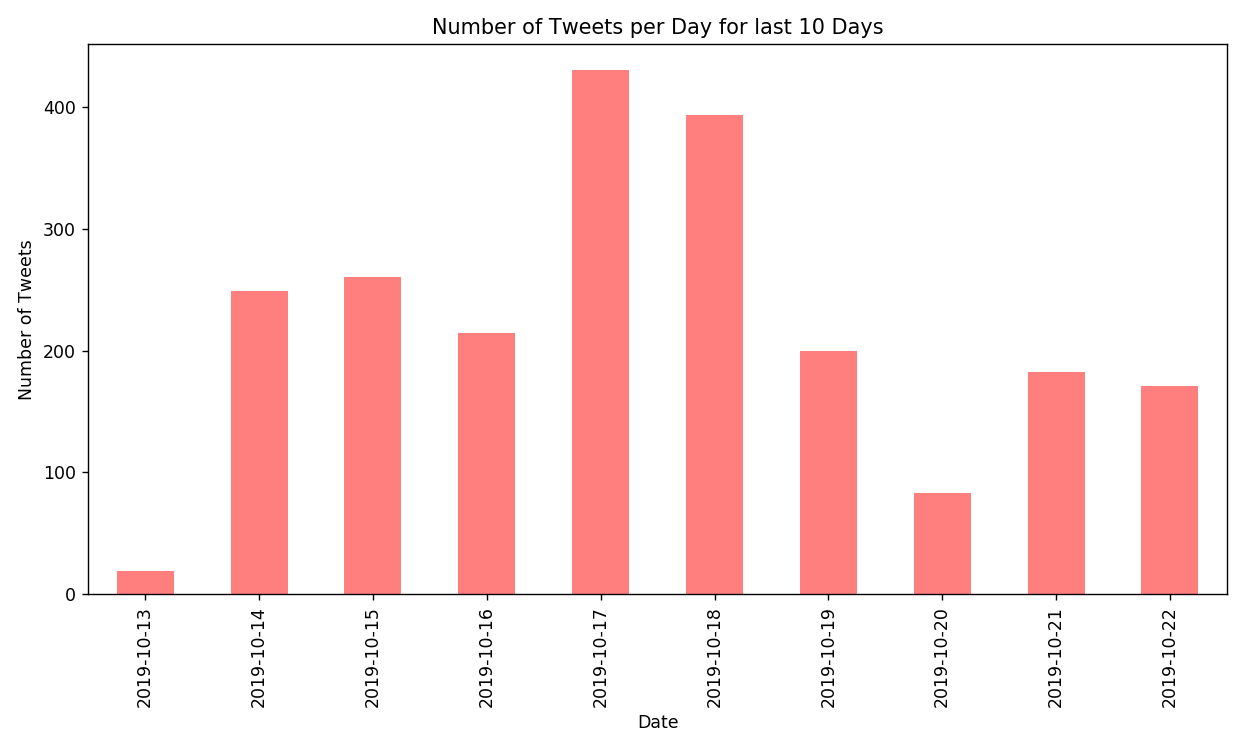

In [63]:
# Use DataFrame.plot() in order to create a bar chart of the data
date_and_tweet.plot(kind="bar", color='r', figsize=(10,6), alpha=0.5, align="center")

# Set a title for the chart
plt.title("Number of Tweets per Day for last 10 Days")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.legend().set_visible(False)
plt.tight_layout()
plt.savefig("../Img/Tweets vs Date.png")
plt.show()